In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
sns.set(style="whitegrid")

df = pd.read_csv("Fire_Events_Cleaned.csv")
df = df[df["alarm"].str.lower() == "on"].copy()

df["zone"] = df["zone"].fillna("Unknown").astype(str)
df["SITEID"] = df["SITEID"].fillna("Unknown")
df["RECORDEDAT"] = pd.to_datetime(df["RECORDEDAT"], errors="coerce")

df = df.dropna(subset=["RECORDEDAT"])
df["zone_site"] = "Zone " + df["zone"]

zone_counts = df["zone_site"].value_counts().head(10)
top_zones = zone_counts.index.tolist()

df["month"] = df["RECORDEDAT"].dt.to_period("M").astype(str)
top_5_zones = zone_counts.head(5).index
monthly_data = df[df["zone_site"].isin(top_5_zones)].groupby(["month", "zone_site"]).size().unstack(fill_value=0)

site_counts = df["SITEID"].value_counts()

/var/folders/9p/_b4dc0y971nch8xw548c1hjh0000gn/T/ipykernel_51461/3527764285.py:3: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Fire_Events_Cleaned.csv")


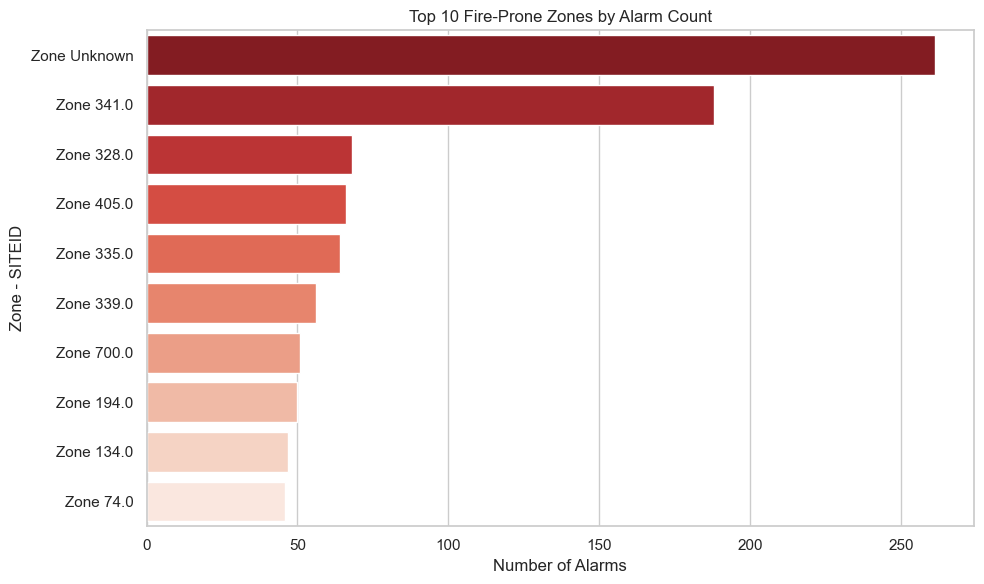

In [3]:
# Top 10 fire-prone zones
plt.figure(figsize=(10, 6))
sns.barplot(x=zone_counts.values, y=zone_counts.index, palette="Reds_r")
plt.title("Top 10 Fire-Prone Zones by Alarm Count")
plt.xlabel("Number of Alarms")
plt.ylabel("Zone - SITEID")
plt.tight_layout()
plt.show()

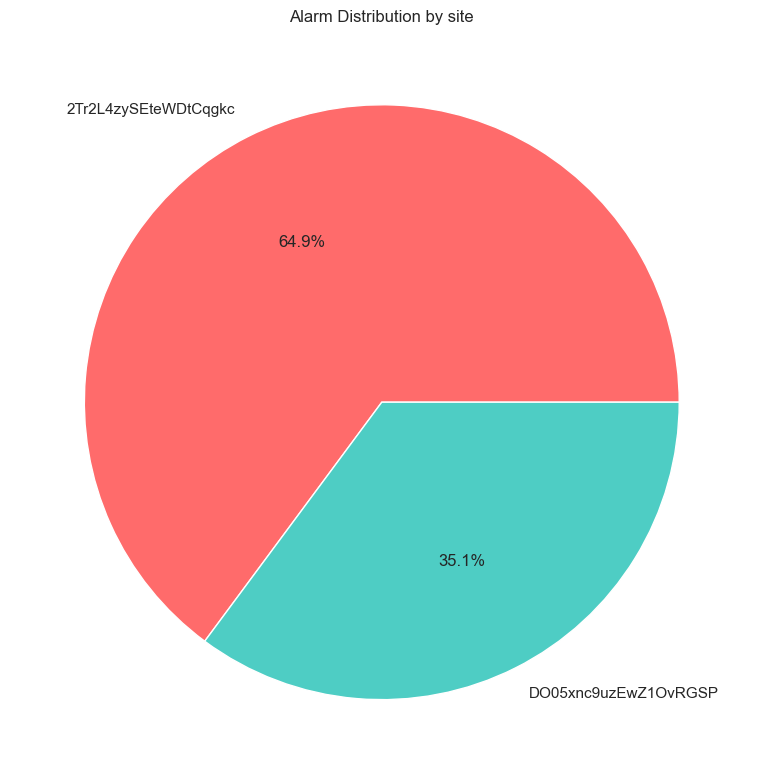

In [4]:
# Pie chart of alarm distribution by site
plt.figure(figsize=(8, 8))
plt.pie(site_counts, labels=site_counts.index, autopct="%1.1f%%", colors=["#FF6B6B", "#4ECDC4"])
plt.title("Alarm Distribution by site")
plt.tight_layout()
plt.show()